[10 minute pandas guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#min)

[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

# Задание по pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('tweets.csv')
positive = pd.read_csv('positive-words.txt', sep='\n')


In [2]:
negative = pd.read_csv('negative-words.txt', sep='\n', header=None, names=["a-"])

In [3]:
def tod_converter(timestamp):
    converter = {'morning': (5, 13),
                 'afternoon': (13, 16),
                 'evening': (16, 23)}
                 
    hour = timestamp.hour
    
    for tod in converter:
        if hour in range(*converter[tod]):
            return tod
    return 'night'

df['created_at'] = pd.to_datetime(df['created_at'])
df['time_of_day'] = df['created_at'].apply(tod_converter)

In [4]:
df.head

<bound method NDFrame.head of                created_at  likes  retweets  \
0     2019-08-07 22:36:56   7566      1498   
1     2019-08-07 05:00:38  21886      5984   
2     2019-08-07 04:52:33   6462      1266   
3     2019-08-06 08:35:26    466        61   
4     2019-08-06 07:33:20   3971       906   
...                   ...    ...       ...   
31110 2018-12-20 05:28:36      3         1   
31111 2018-12-20 05:18:28      2         0   
31112 2018-12-19 09:50:56     31         4   
31113 2018-12-19 05:49:03      5         0   
31114 2018-12-18 05:59:09     31         6   

                                                   tweet time_of_day  
0      @naval: Unresolved thoughts, prematurely pushe...     evening  
1      @naval: The modern mind is overstimulated and ...     morning  
2      @naval: The Lindy Effect for startups:\n\nThe ...       night  
3           @naval: @orangebook_ This was a good tweet.      morning  
4      @naval: Social media lowers the cost of raisin...     m

`Задание 1`:

Выделить никнейм автора, содержащийся в колонке `tweet` **в самом начале** между знаками `@` и `:`, в отдельную колонку `handle` 

Содержание твитов в колонке `tweet` избавить от этого никнейма

Воспользуйтесь методом `.apply()` для создания `handle`, написав свою кастомную функцию

In [5]:
def parse_handle(tweet):
    handle = tweet[1:tweet.find(':')]
    return handle

df['handle'] = df['tweet'].apply(parse_handle)

In [6]:
df['tweet']=df['tweet'].str.split(':').str[1]

In [7]:
df.head()

,created_at,likes,retweets,tweet,time_of_day,handle
0,2019-08-07 22:36:56,7566,1498,"Unresolved thoughts, prematurely pushed out o...",evening,naval
1,2019-08-07 05:00:38,21886,5984,The modern mind is overstimulated and the mod...,morning,naval
2,2019-08-07 04:52:33,6462,1266,The Lindy Effect for startups,night,naval
3,2019-08-06 08:35:26,466,61,@orangebook_ This was a good tweet.,morning,naval
4,2019-08-06 07:33:20,3971,906,Social media lowers the cost of raising &amp;...,morning,naval


`Задание 2`:

Создайте колонку `num_mentions`, в которой посчитайте, сколько раз в каждом из твитов были упомянуты логины других пользователей (считаются только упоминания, начинающиеся с `@`)

Воспользуйтесь методом `.apply()` для этого, написав свою кастомную функцию

In [8]:
def count_mentions(tweet):
    mentions = tweet.count('@')
    return mentions

df['num_mentions'] = df['tweet'].apply(count_mentions)

In [9]:
df.head()

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions
0,2019-08-07 22:36:56,7566,1498,"Unresolved thoughts, prematurely pushed out o...",evening,naval,0
1,2019-08-07 05:00:38,21886,5984,The modern mind is overstimulated and the mod...,morning,naval,0
2,2019-08-07 04:52:33,6462,1266,The Lindy Effect for startups,night,naval,0
3,2019-08-06 08:35:26,466,61,@orangebook_ This was a good tweet.,morning,naval,1
4,2019-08-06 07:33:20,3971,906,Social media lowers the cost of raising &amp;...,morning,naval,0




`Задание 3`:

Постройте столбчатую диаграмму распределения числа твитов по месяцам.

В какой месяц какого года было опубликовано больше всего твитов?

In [10]:
import numpy as np

In [11]:
df.head()

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions
0,2019-08-07 22:36:56,7566,1498,"Unresolved thoughts, prematurely pushed out o...",evening,naval,0
1,2019-08-07 05:00:38,21886,5984,The modern mind is overstimulated and the mod...,morning,naval,0
2,2019-08-07 04:52:33,6462,1266,The Lindy Effect for startups,night,naval,0
3,2019-08-06 08:35:26,466,61,@orangebook_ This was a good tweet.,morning,naval,1
4,2019-08-06 07:33:20,3971,906,Social media lowers the cost of raising &amp;...,morning,naval,0


In [12]:
df['yearmonth']=df['created_at'].map(lambda x: x.year *100 + x.month)
ex=df.groupby(['yearmonth']).size() #можно также сделать через value_counts
dff=pd.DataFrame(ex)
dff=dff.reset_index() #название столбцов
dff.columns=['date','count']

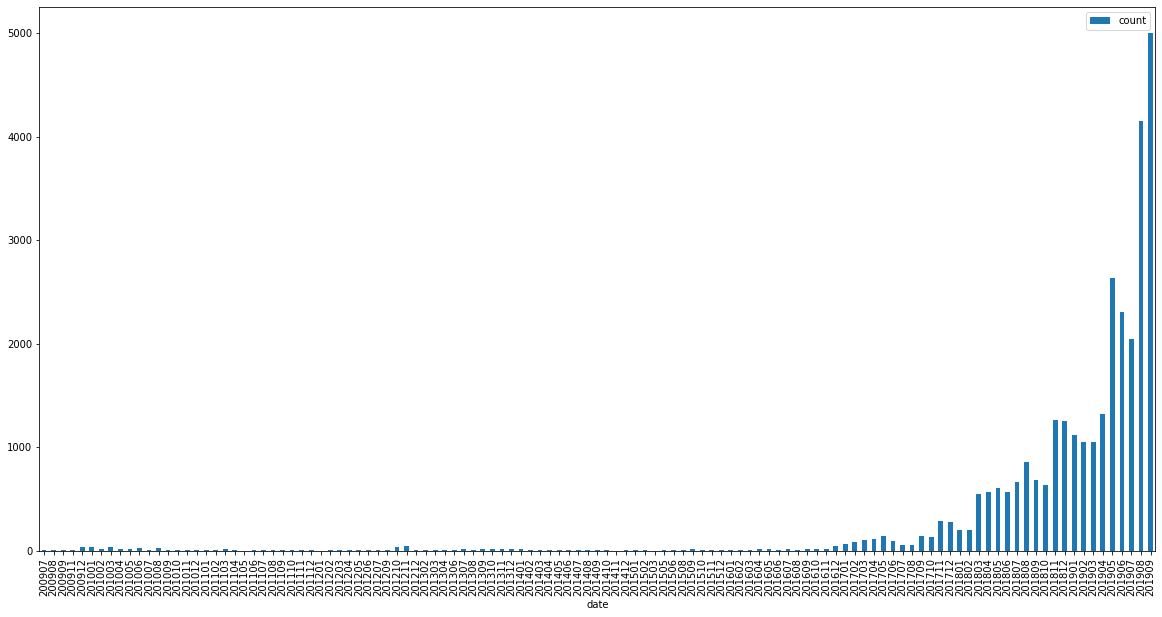

In [13]:
dff.plot.bar(x='date', y='count', figsize=(20, 10))

`Задание 3`:

Посчитайте соотношение ретвитов к лайкам, записав значение в колонку `rt_ratio`

Заполните случаи деления на ноль (`inf`) значениями  `0` с помощью метода `.replace()`


In [14]:
df['rt_ratio'] = df['retweets'] / df['likes']
df['rt_ratio'] = df['rt_ratio'].replace(np.inf, 0)
df['rt_ratio'] = df['rt_ratio'].replace(np.nan, 0)

In [15]:
df['rt_ratio']

0        0.197991
1        0.273417
2        0.195915
3        0.130901
4        0.228154
           ...   
31110    0.333333
31111    0.000000
31112    0.129032
31113    0.000000
31114    0.193548
Name: rt_ratio, Length: 31115, dtype: float64

`Задание 4`:

Выделите топ-5 популярных авторов (по среднему количеству лайков), количество твитов которых превышает `500`.
Среди этих твитов выделите только те, у которых больше 30 лайков.

Для подсчета твитов и усреднения лайков используйте `.groupby('author').agg({...})`

In [16]:
#1 - авторы с более 500 твитами
#2 - топ 5 авторов по кол-ву лайков
#3 - посты с более 30 лайками

In [17]:
df.head()

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions,yearmonth,rt_ratio
0,2019-08-07 22:36:56,7566,1498,"Unresolved thoughts, prematurely pushed out o...",evening,naval,0,201908,0.197991
1,2019-08-07 05:00:38,21886,5984,The modern mind is overstimulated and the mod...,morning,naval,0,201908,0.273417
2,2019-08-07 04:52:33,6462,1266,The Lindy Effect for startups,night,naval,0,201908,0.195915
3,2019-08-06 08:35:26,466,61,@orangebook_ This was a good tweet.,morning,naval,1,201908,0.130901
4,2019-08-06 07:33:20,3971,906,Social media lowers the cost of raising &amp;...,morning,naval,0,201908,0.228154


In [38]:
popular_authors = df.groupby('handle').agg({'likes':'mean', 'tweet':'count'})

In [39]:
popular_authors

,likes,tweet
handle,,
0rganicplease,7.000000,1
0x49fa98,397.470588,17
0xProject,155.000000,1
1350Groyper,2276.000000,1
17cShyteposter,755.000000,1
...,...,...
zikisgenjoshua,2.000000,1
zombiemikemma,10.000000,1
zooko,346.500000,4


In [40]:
popular_authors = popular_authors[(popular_authors['tweet']>500)]

In [41]:
top5 = pd.DataFrame(popular_authors.nlargest(5, 'likes'))

In [42]:
top5

,likes,tweet
handle,,
ThomasSowell,4024.372890,2073
TheStoicEmperor,1194.392901,817
shl,836.017054,645
LifeMathMoney,399.805318,1053
EdLatimore,394.759053,718


In [43]:
top5 = df[(df['handle'].isin(['ThomasSowell', 'TheStoicEmperor', 'shl','LifeMathMoney','EdLatimore']) == True)]

In [44]:
top5 = top5[(top5['likes']>30)]

In [46]:
top5

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions,yearmonth,rt_ratio
1577,2019-09-20 21:47:49,55,17,Some statements are so incorrect that you sho...,evening,EdLatimore,0,201909,0.309091
1579,2019-09-20 21:37:42,42,9,The best and worst things in life walk hand i...,evening,EdLatimore,0,201909,0.214286
1584,2019-09-20 20:04:01,36,10,Intermittent Fasting allows you to lose fat s...,evening,EdLatimore,1,201909,0.277778
1586,2019-09-20 19:34:02,120,28,"If you haven't accomplished anything, you don...",evening,EdLatimore,0,201909,0.233333
1587,2019-09-20 19:31:35,70,9,Everyone wanna talk bad about crackheads unti...,evening,EdLatimore,0,201909,0.128571
...,...,...,...,...,...,...,...,...,...
30470,2018-11-24 04:37:54,1065,298,Some make a name for themselves by destroying...,night,TheStoicEmperor,0,201811,0.279812
30471,2018-11-21 06:01:00,1192,274,By his acts you will know him.\n\nHis words m...,morning,TheStoicEmperor,0,201811,0.229866
30472,2018-11-19 05:08:55,1208,269,"Wrongdoing may be forgiven, but it should not...",morning,TheStoicEmperor,0,201811,0.222682
30473,2018-11-17 08:09:15,2178,685,Pain is a teacher that commands the attention...,morning,TheStoicEmperor,0,201811,0.314509


`Задание 5`:

В полученном датафрейме посчитайте усредненные значения `rt_ratio` по каждому автору и времени дня с помощью `.groupby(['author', 'time_of_day']).agg(...)`

Отразите значения для каждого автора и времени дня в графике вида `hbar`. Данный график показывает в какое время дня посты вызывают наибольший охват и внимание пользователей.

In [25]:
timeday =top5.groupby(['handle', 'time_of_day']).agg({'rt_ratio':'mean'})

In [26]:
timeday

rt_ratio
handle          time_of_day          
EdLatimore      afternoon    0.206263
                evening      0.196130
                morning      0.194082
                night        0.180035
LifeMathMoney   afternoon    0.154371
                evening      0.178401
                morning      0.177642
                night        0.196498
TheStoicEmperor afternoon    0.266306
                evening      0.264312
                morning      0.264803
                night        0.265725
ThomasSowell    afternoon    1.197107
                evening      0.712252
                morning      0.457836
                night        1.098023
shl             afternoon    0.144957
                evening      0.133309
                morning      0.135902
                night        0.122811

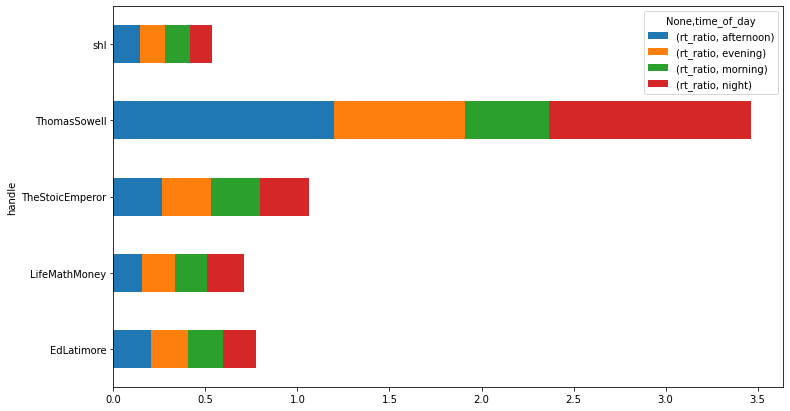

In [28]:
timeday.unstack().plot(kind='barh', stacked=True, figsize=(12, 7))

`Задание 6`: 

Используя `WordNetLemmatizer()`, `nltk.word_tokenize()` и словарь положительных и отрицательных слов (`positive-words.txt`, `negative-words.txt`), а также метод `.apply()` высчитайте индекс тональности для твиттов и запишите в колонке `sentiment`.

Выделите 10% самых позитивных и 10% самых негативных твиттов с помощью 1-го и 9-го дециля

Выведите их построчно



In [29]:
import nltk
from nltk import WordNetLemmatizer

In [49]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
import nltk
from nltk import WordNetLemmatizer

def count_sentiment_score(tweet):
    words = nltk.word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in words])
    words=nltk.word_tokenize(lemmatized_output)
    score = 0
    for word in words:
        if word in positive:
            score +=1
        elif word in negative:
            score -=1
    return score

In [31]:
def count_sentiment_score(tweet):
    score = 0
    word_list = nltk.word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    word_list=nltk.word_tokenize(lemmatized_output)
    for word in word_list:
        if word in positive.values:
            score +=1
        elif word in negative.values:
            score -=1
    return score

In [50]:
df['sentiment'] = df['tweet'].apply(count_sentiment_score)

In [51]:
df['sentiment']

0       -2
1        2
2        0
3        1
4       -1
        ..
31110   -1
31111    0
31112    1
31113   -2
31114    1
Name: sentiment, Length: 31115, dtype: int64

In [52]:
np.nanpercentile(df['sentiment'], 10) #10% самых негативных твитов меньше либо равно -2

-2.0

In [53]:
df[df['sentiment']<=-2]

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions,yearmonth,rt_ratio,sentiment
0,2019-08-07 22:36:56,7566,1498,"Unresolved thoughts, prematurely pushed out o...",evening,naval,0,201908,0.197991,-2
80,2019-05-27 08:11:05,8754,2135,Modern society will shame you for earning mon...,morning,naval,0,201905,0.243889,-3
111,2019-05-02 01:14:07,7273,1549,It’s hard to see how credit cards survive at ...,night,naval,0,201905,0.212980,-2
140,2019-03-28 16:26:44,64,19,Tech advances will inevitably bring doomsday ...,evening,Rob_Reid,1,201903,0.296875,-6
150,2019-03-26 03:49:27,375,92,"""They need intelligence or they’ll head in th...",night,naval,0,201903,0.245333,-2
...,...,...,...,...,...,...,...,...,...,...
31080,2019-01-07 06:05:21,4,0,Some people pretend to be vulnerable just to ...,morning,uncannyinsights,0,201901,0.000000,-2
31086,2019-01-03 14:32:04,7,0,People who laugh at others weaknesses have no...,afternoon,uncannyinsights,0,201901,0.000000,-6
31089,2019-01-02 06:12:41,51,15,Insecurity is the outcome of fear and fear is...,morning,uncannyinsights,0,201901,0.294118,-3
31092,2018-12-30 13:49:13,3,1,Facility increases madness. If people have le...,afternoon,uncannyinsights,0,201812,0.333333,-2


In [54]:
np.nanpercentile(df['sentiment'], 90) #10% самых положительных твитов больше либо равно 2

2.0

In [55]:
df[df['sentiment']>2] 

,created_at,likes,retweets,tweet,time_of_day,handle,num_mentions,yearmonth,rt_ratio,sentiment
21,2019-07-09 04:19:28,3099,545,Spirituality is a luxury good. In olden times...,night,naval,0,201907,0.175863,3
22,2019-07-07 13:18:34,333,59,“You’re not going to get rich renting out you...,afternoon,ThoughtReps,2,201907,0.177177,3
78,2019-05-27 09:55:24,133,24,@rivervalleysea When it comes to technology d...,morning,naval,1,201905,0.180451,3
86,2019-05-23 20:00:55,2282,513,"""The most important trick to be happy is to r...",evening,NavalBot,1,201905,0.224803,6
92,2019-05-19 01:40:50,11672,2664,Everybody wants to hire the best. \n\nVery fe...,night,naval,0,201905,0.228239,3
...,...,...,...,...,...,...,...,...,...,...
30999,2019-05-14 15:22:34,15,2,People have a great appeal for those pieces o...,afternoon,uncannyinsights,0,201905,0.133333,3
31001,2019-05-13 03:47:10,6,2,True love is unselfish. False love is selfish...,night,uncannyinsights,0,201905,0.333333,4
31050,2019-03-22 11:03:49,5,1,Understanding leads to awareness and awarenes...,morning,uncannyinsights,0,201903,0.200000,3
31088,2019-01-02 12:57:10,3,2,Life is much happier and enjoyable in the sta...,morning,uncannyinsights,0,201901,0.666667,4
